In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import numpy.ma as ma
from scipy.stats import median_absolute_deviation
import scipy.special

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
OUTPUT_FOLDER = '/Users/nityaravi/Documents/Research/data/manga/output_files/'
Ha_vel_fn = OUTPUT_FOLDER + 'DRP_HaVel_map_results_RD.fits'
BB_Ha_vel_fn = OUTPUT_FOLDER + 'DRP_HaVel_map_results_BB_smooth_lt_2.0_.fits'
#dust_metallicity_fn = OUTPUT_FOLDER + 'dustMass.fits'
#HI_H2_fn = OUTPUT_FOLDER + 'HI_H2_CMD.fits'
#disk_fn = OUTPUT_FOLDER + 'stelMass_diskFit.fits'

In [4]:
tab = Table.read(Ha_vel_fn)
x = tab[0]['b']
i_gal  = np.where(tab['b'] != x)

In [5]:
np.max(tab[i_gal]['b'])

8736.293440503176

In [6]:
np.where(tab[i_gal]['b']==np.min(tab[i_gal]['b']))

(array([49]),)

In [7]:
np.where(tab[i_gal]['plateifu'] == '8077-12704')

(array([20]),)

In [8]:
gal = tab[i_gal][20]
gal

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,b,b_err,Rmax,M,M_err,fit_flag
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8077,12704,8077-12704,1-37018,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,41.2805684533,0.950165001317,171.791566992,-50.8096925396,41.280568,0.95016498,0.0363855,9,8100.78,0,20.9622,41.6884,ma090,34,4,8637,40.7631,0.0,1.17727,1.18562,1.21035,1.22682,1.44387,1.96505,0.837018,0.854791,0.867848,57307,57307,57308,2.47143,2.52915,2.53055,2.51717,1552,0,0,1,plateTargets-1.par,7713,J024507.33+005700.5,127,127,0,0.024507,0.0219292,0.0287106,0.0428584,0.0471242,0.0214484,0.0288703,0.67973,1.47977,0.576382,0.62423,-999.0,-999.0,1.3691,0.558788,0.603645,605,7717,1,v1_0_1,39444,-999,0.024507,0.0248579,-16.0836 .. -20.4444,-16.4343 .. -20.1317,496.93 .. 662.875,11594500000.0,7474500000.0,0.854854,165.967,0.301664 .. 0.0538193,9.81179,9.06025,49.2709 .. 1926.09,1.18514 .. 0.000495382,49.8042 .. 1929.15,1.15251 .. 0.000520471,0.83628,2.67795,165.814,12.4111,35.9801 .. 2569.08,1.44568 .. 0.0081103,0.7767429870421072,23.467266082763672,15.463497727538414,5.169956644813376,0.8803543463734305,0.17552445843546893,36.23530819195443,1.2787096871398875,36.08632490620968,1.6974805374703585,352.7293856429959,2.7136255729202037,260.9237102783413,539.7431639170029,0.46969459972498623,1.7233959459347712,2.6744591664549526,0.6266210269799625,1.313583042984958,-0.0023329854741373536,0.062149089100061186,6.517251392744928,10.893252696805929,13.130699129809583,-3.0


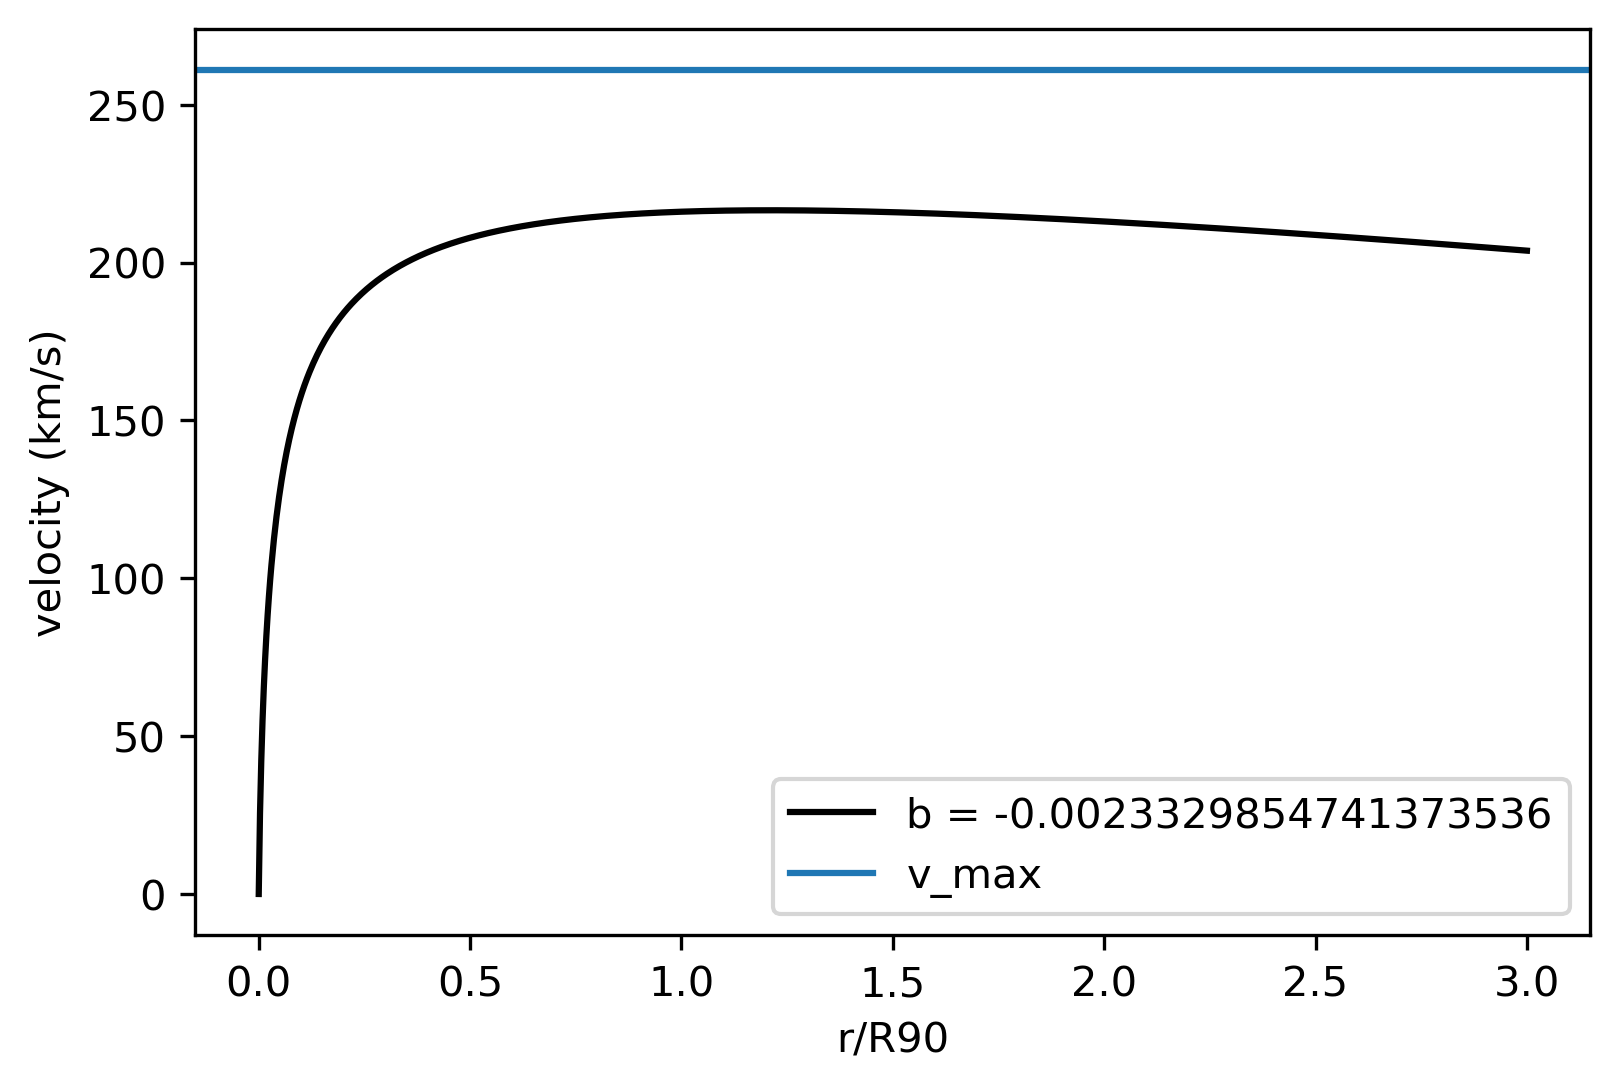

In [9]:
R90 = gal['nsa_elpetro_th90']
v_max = gal['v_max']
b = gal['b']
alpha = gal['alpha']
r = np.linspace(0,3*R90, 1000)
r_turn = gal['r_turn']
plt.plot(r/R90, v_max*r*(1+b*r)/(r_turn**alpha +r**alpha)**(1/alpha), label='b = ' + str(b), color='k')
plt.axhline(v_max, label='v_max')
plt.xlabel('r/R90')
plt.ylabel('velocity (km/s)')
plt.legend()
plt.show()

In [10]:
tab_BB = Table.read(BB_Ha_vel_fn)
np.where(tab_BB['plateifu'] == '8077-12704')

(array([4759]),)

In [11]:
gal_BB = tab_BB[4759]
gal_BB

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8077,12704,8077-12704,1-37018,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,41.2805684533,0.950165001317,171.791566992,-50.8096925396,41.280568,0.95016498,0.0363855,9,8100.78,0,20.9622,41.6884,ma090,34,4,8637,40.7631,0.0,1.17727,1.18562,1.21035,1.22682,1.44387,1.96505,0.837018,0.854791,0.867848,57307,57307,57308,2.47143,2.52915,2.53055,2.51717,1552,0,0,1,plateTargets-1.par,7713,J024507.33+005700.5,127,127,0,0.024507,0.0219292,0.0287106,0.0428584,0.0471242,0.0214484,0.0288703,0.67973,1.47977,0.576382,0.62423,-999.0,-999.0,1.3691,0.558788,0.603645,605,7717,1,v1_0_1,39444,-999,0.024507,0.0248579,-16.0836 .. -20.4444,-16.4343 .. -20.1317,496.93 .. 662.875,11594500000.0,7474500000.0,0.854854,165.967,0.301664 .. 0.0538193,9.81179,9.06025,49.2709 .. 1926.09,1.18514 .. 0.000495382,49.8042 .. 1929.15,1.15251 .. 0.000520471,0.83628,2.67795,165.814,12.4111,35.9801 .. 2569.08,1.44568 .. 0.0081103,0.7767429870421072,23.467266082763672,15.069099469888112,5.024346850987066,0.8821354943422514,0.14985633397418127,36.14376120841341,1.2492436617336193,36.12058565181149,1.6812979749138715,352.7383936722808,2.713321028267961,210.46636915420416,144.8746567667697,0.8222675298899436,1.5339088153151468,2.632295799615261,1.0585089143440773,1.8611140379465672,6.510323848771458,10.867338335470095,10.636390301650888,5.0


In [12]:
v_max_BB = gal_BB['v_max']
alpha_BB = gal_BB['alpha']
r_turn_BB = gal_BB['r_turn']

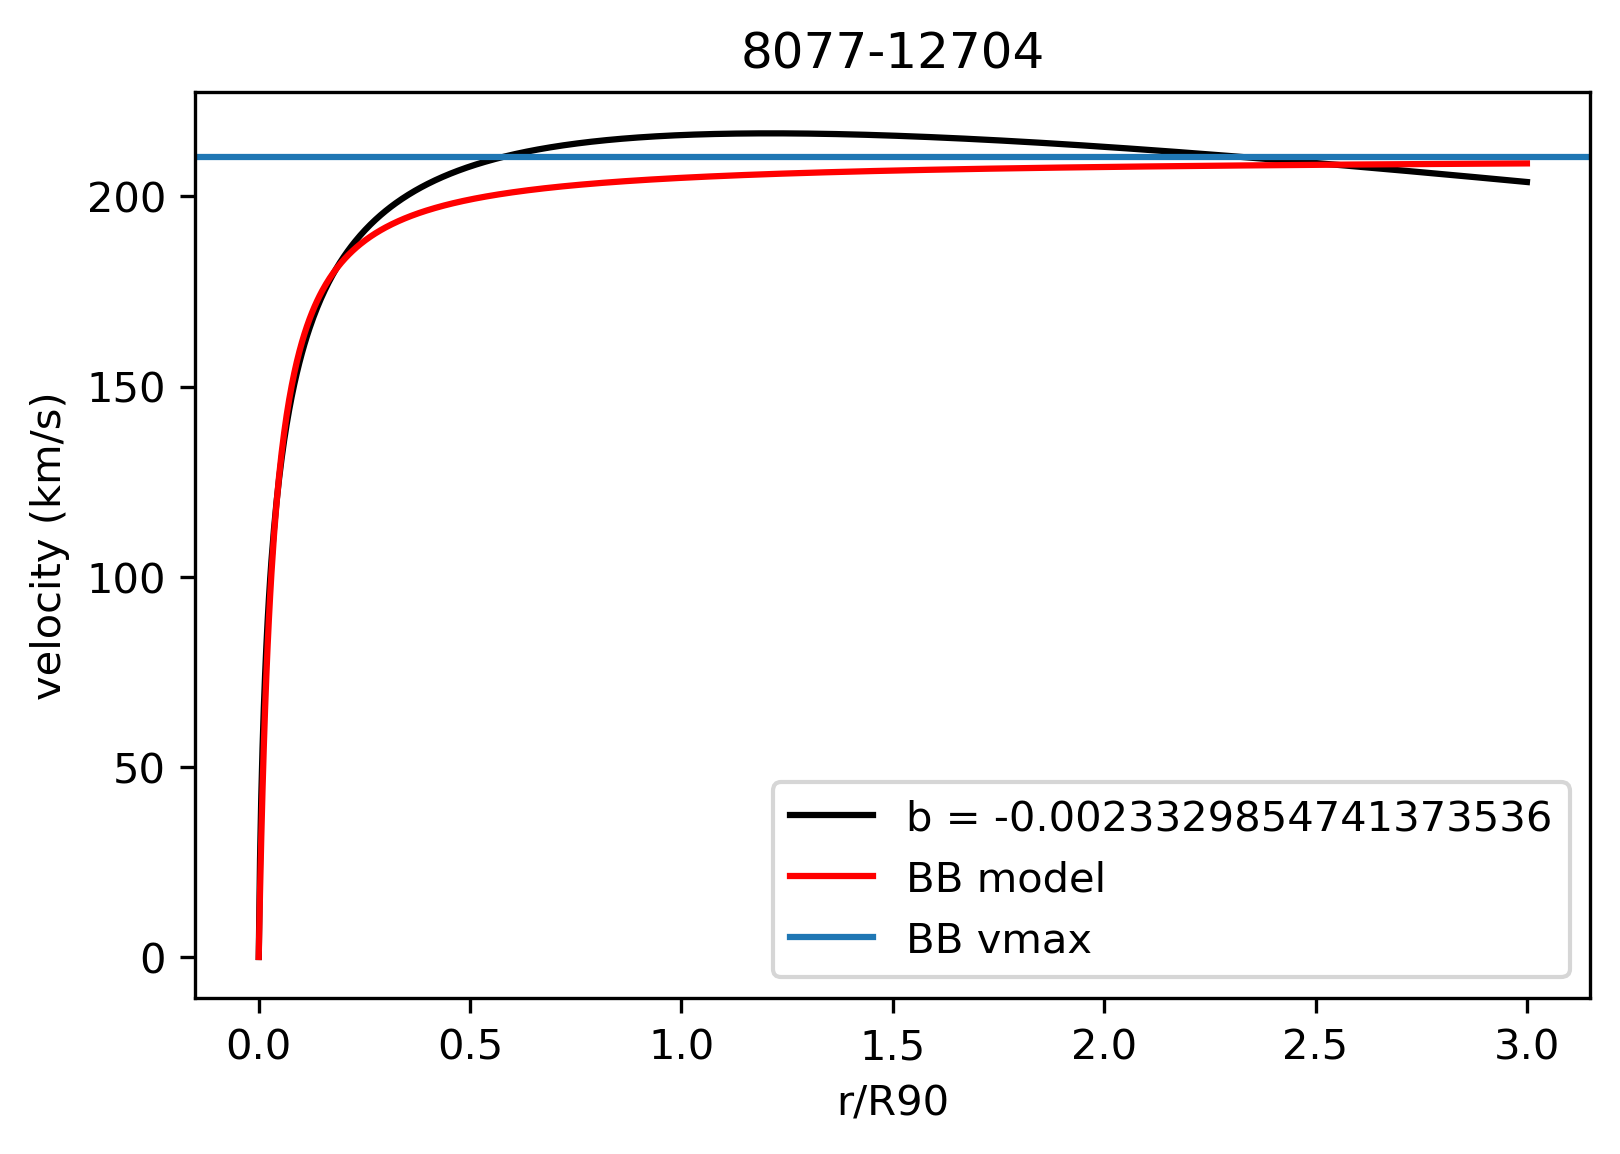

In [13]:
plt.plot(r/R90, v_max*r*(1+b*r)/(r_turn**alpha +r**alpha)**(1/alpha), label='b = ' + str(b), color='k')
plt.plot(r/R90, v_max_BB*r / (r_turn_BB**alpha_BB +r**alpha_BB)**(1/alpha_BB), color='r', label='BB model')
#plt.axhline(v_max, label='vmax')
plt.axhline(v_max_BB, label= 'BB vmax')
plt.xlabel('r/R90')
plt.ylabel('velocity (km/s)')
plt.legend()
plt.title('8077-12704')
#plt.show()
plt.savefig('8077-12704')

In [14]:
i_gal_BB = np.zeros(120, dtype='int64')
for i in range(0,120):
    i_gal_BB[i] = int(np.where(tab_BB['plateifu'] == tab[i_gal[0][i]]['plateifu'])[0][0])

In [15]:
tab[i_gal]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,b,b_err,Rmax,M,M_err,fit_flag
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,3702,10001-3702,1-48136,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,132.912768243,57.1074235568,159.953426496,38.6775525446,132.91277,57.107424,0.0514359,9,8100.81,0,20.0835,41.292,ma059,27,3,9114,134.41357,57.604214,1.10351,1.15123,1.2136,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.78204,2.697,2.66091,2.65034,1168,0,0,1,plateTargets-1.par,6013,J085139.06+570626.6,37,37,0,0.0256063,0.0209427,0.0277508,0.0411511,0.0453793,0.0209427,0.0277508,0.67973,1.59185,0.62473,0.67632,-999.0,-999.0,1.59369,0.625013,0.676652,31,3600,5,v1_0_1,51205,-999,0.0256063,0.0259852,-16.4627 .. -19.8832,-15.7075 .. -19.9561,302.65 .. 964.922,6859180000.0,7120350000.0,0.948903,138.512,0.418573 .. 0.0746766,4.25309,4.31484,18.7843 .. 1486.83,1.72907 .. 0.00372412,20.8653 .. 1469.09,1.58889 .. 0.00400578,0.896258,6.0,129.743,4.30119,42.0745 .. 1376.8,0.475689 .. 0.018242,1.4364336310030654,13.263102531433105,0.24268314370886487,2.541482438145929,0.9964530399491367,0.003802117705926244,22.624434357034662,0.9387784391808233,21.99059850913795,0.8902628720949007,131.925038829756,3.5696376005842314,301.781755922322,161.60146133168877,0.8755101192141647,0.22987544887857364,5.937228087170584,8.18481218993757,17.319856106096896,-0.11598446123524135,0.18542138380362075,3.128604358481933,10.28105357038784,12.166627757958945,-4.0
10214,6101,10214-6101,1-153412,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,123.061819419,35.1571384443,186.3614094,30.920235001,123.06182,35.157138,0.0491046,9,8100.85,0,18.7723,35.5879,ma069,21,3,10671,122.5438,34.962757,1.05805,1.11054,1.18527,1.5155,1.74376,2.12453,0.881434,0.976979,1.01187,58076,58077,58077,2.80282,2.7674,2.7475,2.72294,1040,0,0,1,plateTargets-1.par,6093,J081214.82+350925.3,61,61,0,0.0174922,0.0170466,0.0249731,0.0354804,0.0397618,0.0

In [16]:
tab_BB[i_gal_BB]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag [7],nsa_elpetro_absmag [7],nsa_elpetro_amivar [7],nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction [7],nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux [7],nsa_petro_flux_ivar [7],nsa_elpetro_flux [7],nsa_elpetro_flux_ivar [7],nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux [7],nsa_sersic_flux_ivar [7],smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10001,3702,10001-3702,1-48136,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,132.912768243,57.1074235568,159.953426496,38.6775525446,132.91277,57.107424,0.0514359,9,8100.81,0,20.0835,41.292,ma059,27,3,9114,134.41357,57.604214,1.10351,1.15123,1.2136,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.78204,2.697,2.66091,2.65034,1168,0,0,1,plateTargets-1.par,6013,J085139.06+570626.6,37,37,0,0.0256063,0.0209427,0.0277508,0.0411511,0.0453793,0.0209427,0.0277508,0.67973,1.59185,0.62473,0.67632,-999.0,-999.0,1.59369,0.625013,0.676652,31,3600,5,v1_0_1,51205,-999,0.0256063,0.0259852,-16.4627 .. -19.8832,-15.7075 .. -19.9561,302.65 .. 964.922,6859180000.0,7120350000.0,0.948903,138.512,0.418573 .. 0.0746766,4.25309,4.31484,18.7843 .. 1486.83,1.72907 .. 0.00372412,20.8653 .. 1469.09,1.58889 .. 0.00400578,0.896258,6.0,129.743,4.30119,42.0745 .. 1376.8,0.475689 .. 0.018242,1.4364336310030654,13.263102531433105,0.5384219633932998,2.516720895240351,0.9976178787184242,0.0022013327782973934,22.68562639915064,0.9393412891832288,21.853632274864793,0.8985087674248032,131.975538869245,3.568054207679901,313.6762095221658,144.77154403558583,0.7925717678215113,0.14182001631076024,5.955477559454908,8.720845050623494,16.478956167137447,3.1502182919746775,11.052790322774381,10.928525167884018,-4.0
10214,6101,10214-6101,1-153412,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,123.061819419,35.1571384443,186.3614094,30.920235001,123.06182,35.157138,0.0491046,9,8100.85,0,18.7723,35.5879,ma069,21,3,10671,122.5438,34.962757,1.05805,1.11054,1.18527,1.5155,1.74376,2.12453,0.881434,0.976979,1.01187,58076,58077,58077,2.80282,2.7674,2.7475,2.72294,1040,0,0,1,plateTargets-1.par,6093,J081214.82+350925.3,61,61,0,0.0174922,0.0170466,0.0249731,0.0354804,0.0397618,0.0170466,0.0249731,0.67973,1.82089,0.77042,0.830581,-999.0,-999.

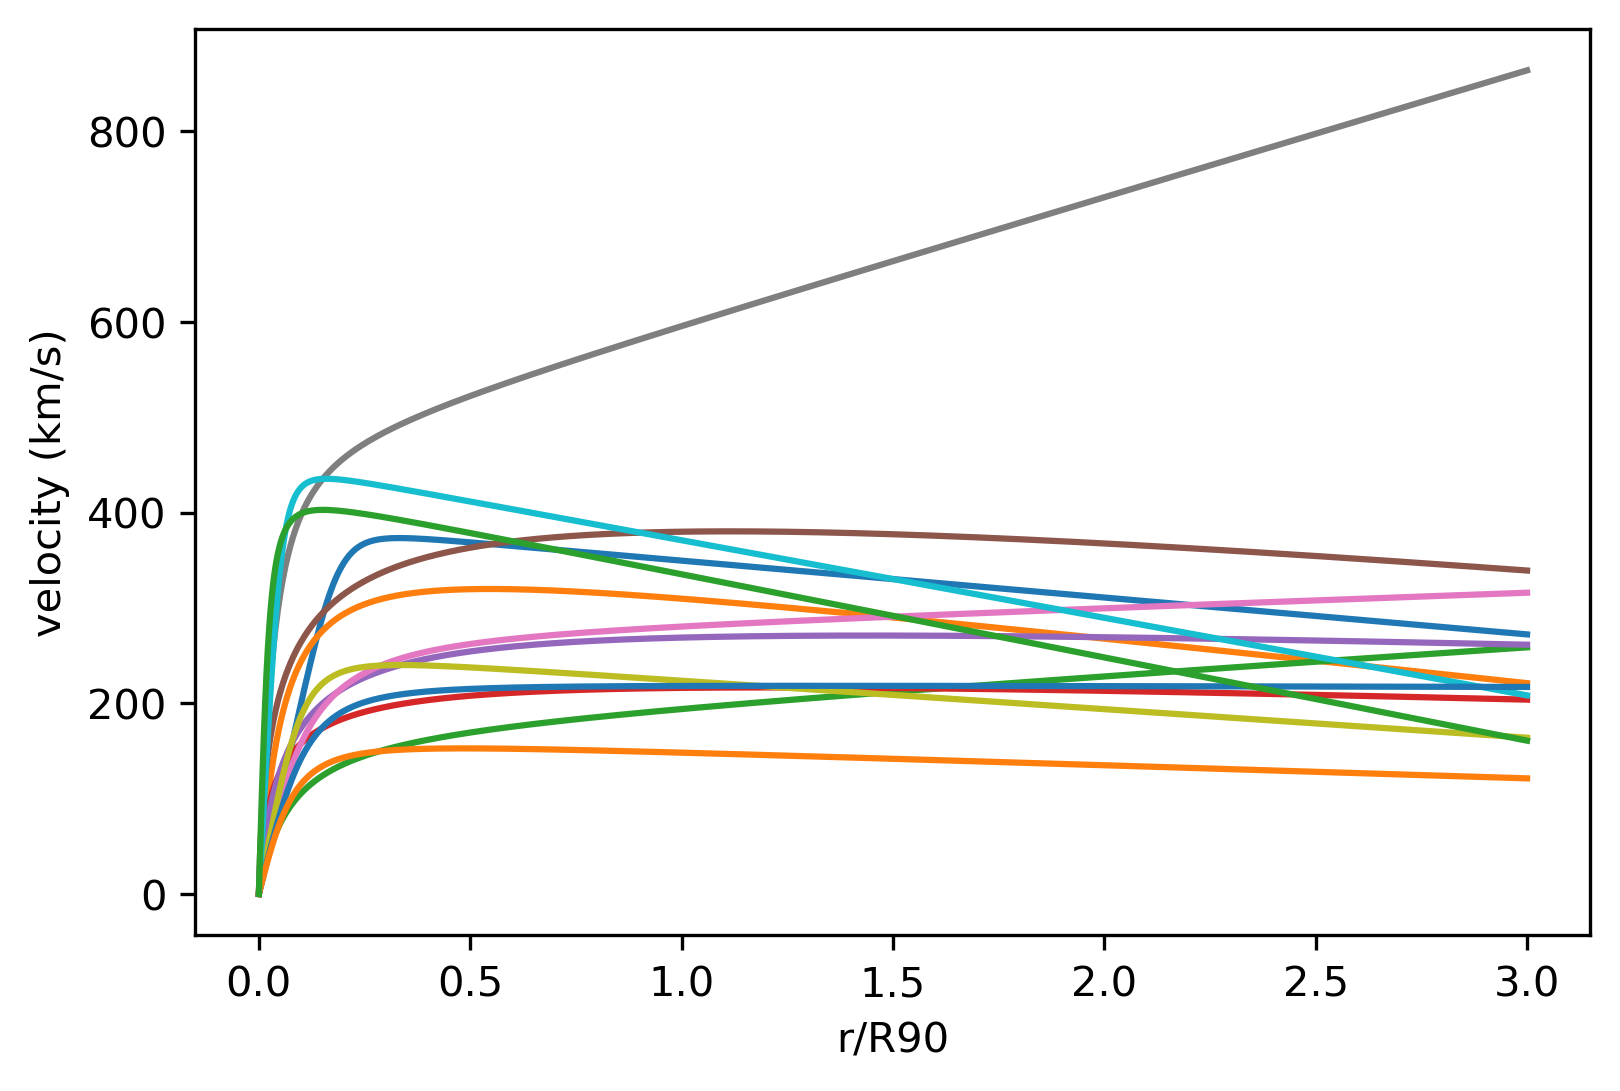

In [17]:
for i in range(0,120):
    
    b = tab[i_gal][i]['b']
    
    if b <= 0.01 and b >= -0.01:
        R90 = tab[i_gal][i]['nsa_elpetro_th90']
        v_max = tab[i_gal][i]['v_max']
        alpha = tab[i_gal][i]['alpha']
        r = np.linspace(0,3*R90, 1000)
        r_turn = tab[i_gal][i]['r_turn']
        plt.plot(r/R90, v_max*r*(1+b*r)/(r_turn**alpha +r**alpha)**(1/alpha))
        #plt.axhline(v_max, label='v_max')
        plt.xlabel('r/R90')
        plt.ylabel('velocity (km/s)')
        #plt.legend()
    
plt.show()

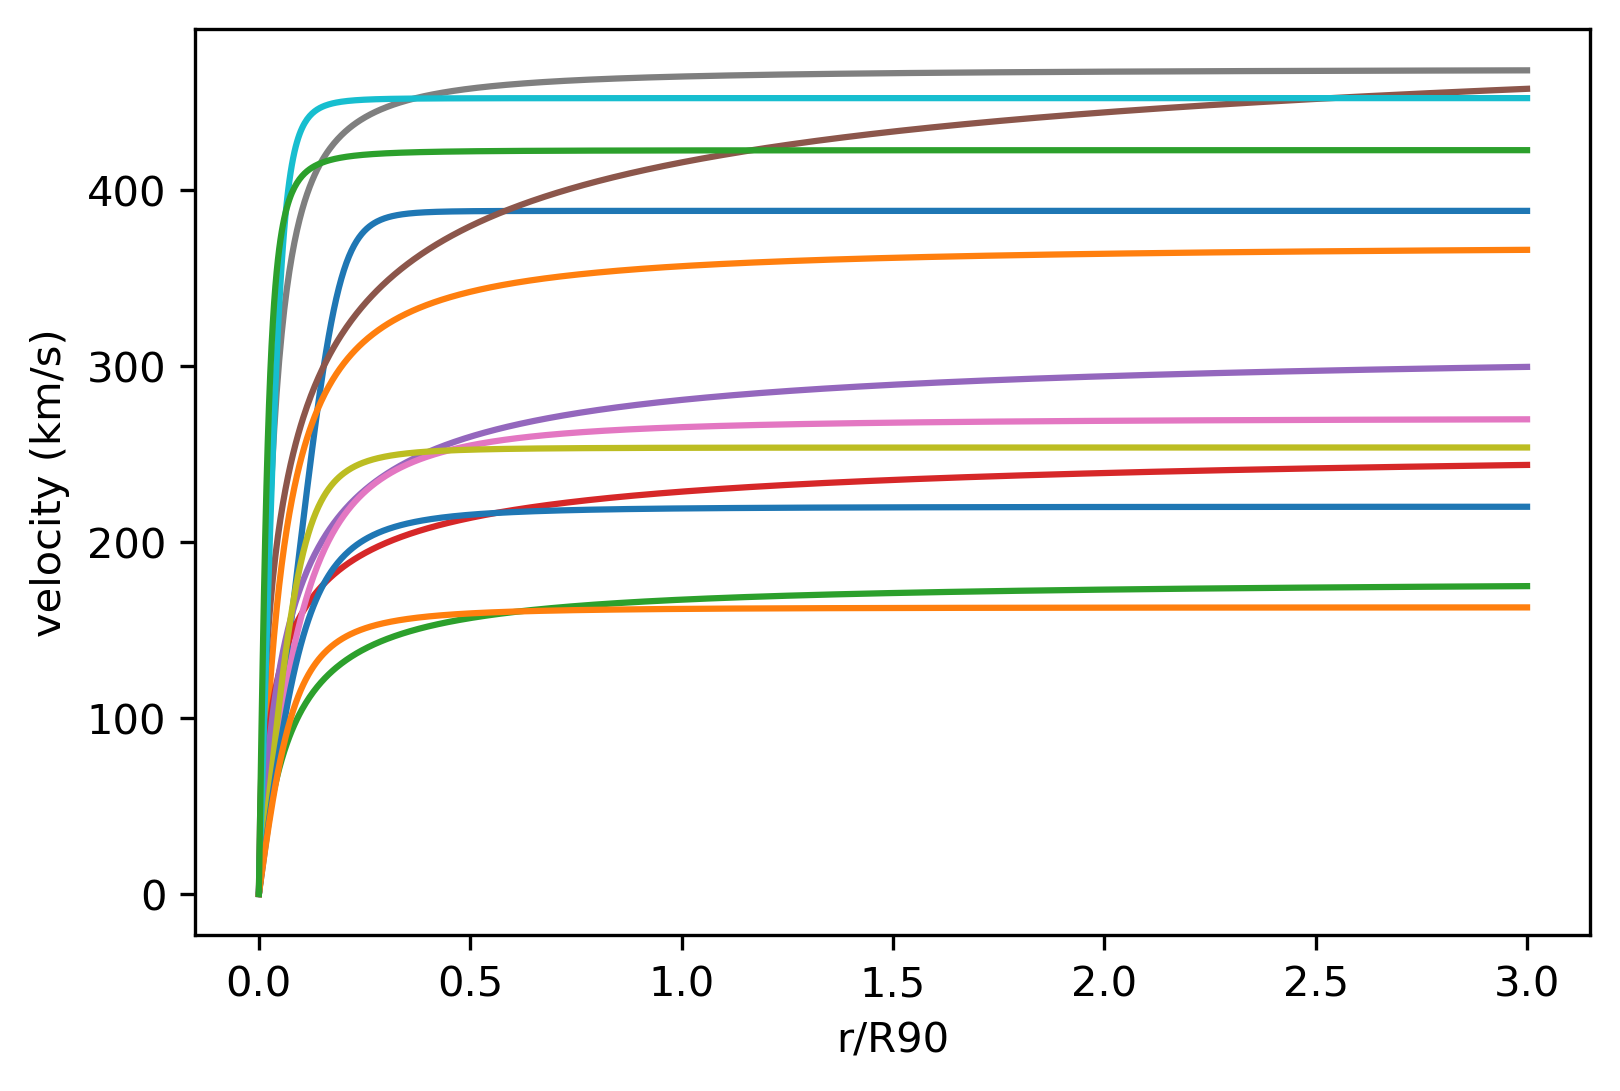

In [18]:
for i in range(0,120):
    
    b = tab[i_gal][i]['b']
    
    if b <= 0.01 and b >= -0.01:
        
        R90 = tab[i_gal_BB][i]['nsa_elpetro_th90']
        v_max = tab[i_gal_BB][i]['v_max']
        alpha = tab[i_gal_BB][i]['alpha']
        r = np.linspace(0,3*R90, 1000)
        r_turn = tab[i_gal_BB][i]['r_turn']
        plt.plot(r/R90, v_max*r/(r_turn**alpha +r**alpha)**(1/alpha))
        #plt.axhline(v_max, label='v_max')
        plt.xlabel('r/R90')
        plt.ylabel('velocity (km/s)')
        #plt.legend()
    
plt.show()